In [139]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

In [129]:
orig_prod_csv = pd.read_csv('avk_hackathon_data_party_products.csv',header=0, delim_whitespace=False)
prod_csv_srtd = orig_prod_csv.sort_values('party_rk')
prod_csv_srtd.head()

,party_rk,product1,product2,product3,product4,product5,product6,product7
4077,1,0,1,0,1,0,0,0
46191,5,0,1,0,0,1,0,0
43257,7,0,0,0,1,0,0,0
2374,8,0,1,0,0,1,0,0
11652,9,0,0,0,1,1,0,0


In [130]:
prod_csv_srtd.party_rk.unique()

array([    1,     5,     7, ..., 94607, 94608, 94610])

In [131]:
n_clients=prod_csv_srtd.party_rk.nunique()
n_clients

50000

In [132]:
#Set party_rk as index, run cosine simlilarity
prod_csv_srtd = prod_csv_srtd.set_index("party_rk")
prod_csv_srtd

,product1,product2,product3,product4,product5,product6,product7
party_rk,,,,,,,
1,0,1,0,1,0,0,0
5,0,1,0,0,1,0,0
7,0,0,0,1,0,0,0
8,0,1,0,0,1,0,0
9,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...
94603,0,1,0,0,1,0,0
94606,0,1,0,0,0,0,0
94607,0,1,0,0,1,0,0


In [133]:
# Get cosine similarity
prod_cos_sim = cosine_similarity( prod_csv_srtd.values, prod_csv_srtd.loc[[1]])
prod_cos_sim

array([[1.        ],
       [0.5       ],
       [0.70710678],
       ...,
       [0.5       ],
       [0.70710678],
       [0.5       ]])

In [134]:
prod_csv_srtd['cosine_prdct'] = prod_cos_sim
prod_csv_srtd

,product1,product2,product3,product4,product5,product6,product7,cosine_prdct
party_rk,,,,,,,,
1,0,1,0,1,0,0,0,1.000000
5,0,1,0,0,1,0,0,0.500000
7,0,0,0,1,0,0,0,0.707107
8,0,1,0,0,1,0,0,0.500000
9,0,0,0,1,1,0,0,0.500000
...,...,...,...,...,...,...,...,...
94603,0,1,0,0,1,0,0,0.500000
94606,0,1,0,0,0,0,0,0.707107
94607,0,1,0,0,1,0,0,0.500000


In [135]:

prod_csv_srtd_cos = prod_csv_srtd.sort_values('cosine_prdct', ascending=False)
prod_csv_srtd_cos.head()

,product1,product2,product3,product4,product5,product6,product7,cosine_prdct
party_rk,,,,,,,,
1,0,1,0,1,0,0,0,1.0
35667,0,1,0,1,0,0,0,1.0
14914,0,1,0,1,0,0,0,1.0
50174,0,1,0,1,0,0,0,1.0
61248,0,1,0,1,0,0,0,1.0


In [137]:
prod_csv_srtd_cos_95 = prod_csv_srtd_cos.loc[(prod_csv_srtd_cos['cosine_prdct'] < 0.99999) & (prod_csv_srtd_cos['cosine_prdct'] > 0.80)]
#prod_csv_srtd_cos_95=prod_csv_srtd_cos_95.drop_duplicates(subset = ["product1","product2","product3","product4","product5","product6","product7"], keep = 'first')
prod_csv_srtd_cos_95

,product1,product2,product3,product4,product5,product6,product7,cosine_prdct
party_rk,,,,,,,,
16556,1,1,0,1,0,0,0,0.816497
11631,0,1,0,1,1,0,0,0.816497
69467,1,1,0,1,0,0,0,0.816497
16545,0,1,1,1,0,0,0,0.816497
41602,1,1,0,1,0,0,0,0.816497
...,...,...,...,...,...,...,...,...
60664,0,1,0,1,0,1,0,0.816497
93182,0,1,0,1,1,0,0,0.816497
63509,0,1,0,1,1,0,0,0.816497


In [141]:
import seaborn as sns

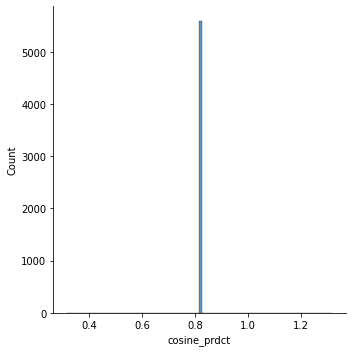

In [150]:
sns.displot(prod_csv_srtd_cos_95['cosine_prdct'], bins=100)